# DT for Cart

In [1]:
import gym

from stable_baselines3 import PPO
import random
import numpy as np
import os
from agents.sbagent import ACAgent
import torch

torch.use_deterministic_algorithms(True)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from agents.dtnet.ppo_policy import DTSemNetACAgent


In [2]:
import gym
import numpy as np
import random
import itertools
from agents.dt.agent import DTAgent

np.set_printoptions(precision=3, suppress=True)

In [3]:
env = gym.make('CartPole-v1')

## Load Weights of Trained Model

In [8]:
MODEL_PATH = '../../trained_models/cart_cpu/dtnet/aaai_v2_new_rand/'
model = PPO.load(f"{MODEL_PATH}seed{62}",
                         policy=DTSemNetACAgent,
                         env=env,
                            device='cpu')
                         

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [9]:
W = model.policy.action_net.linear1.weight.detach().numpy()
B = model.policy.action_net.linear1.bias.detach().numpy()

In [10]:
W

array([[ -3.742,  -3.423,  -3.139,  -2.261],
       [  3.8  ,   1.482,  20.656,   2.124],
       [ -2.273,  -0.608,   0.406,  -0.534],
       [-21.151,   3.877,  53.147,  15.29 ],
       [ -3.254,   0.549,  -3.909,   0.08 ],
       [  0.048,  -1.639,   1.468,  -0.828],
       [  1.506,  -2.666,  -3.068,   0.69 ],
       [  1.267,   0.686,   7.862,   2.682],
       [  5.051,   1.104, -10.028,   2.713],
       [ -0.34 ,  -9.909, -58.476,  -8.941],
       [ -3.507,  -0.985,  -2.051,   3.402],
       [  5.669,  -0.217,  -0.303,   0.936],
       [ -1.941,  -0.534,   0.2  ,  -0.382],
       [  1.341,   0.108,   0.468,  -0.486],
       [ -1.13 ,  -1.183,  -0.404,  -1.492]], dtype=float32)

In [11]:
B

array([ 6.527,  1.924, -4.172,  5.331,  7.019,  3.408,  0.768, -9.081,
        8.549,  2.746,  1.309, -0.473,  2.62 ,  4.108, -1.941],
      dtype=float32)

## 1. Load Default DT 


In [12]:
# Initialize the DT with default parameters
# Default parameters are ranodmly initialized
dt = DTAgent(env='cart')
dt

Agent: Decision Tree
Environment: cart
State dimension: 4
Action Dimension: 2
Number of nodes: 15
Number of leaves: 16
Node weights: [[0.879 0.347 0.347 0.658]
 [0.792 0.392 0.971 0.707]
 [0.855 0.922 0.509 0.745]
 [0.133 0.323 0.926 1.   ]
 [0.093 0.92  0.035 0.128]
 [0.881 0.826 0.48  0.183]
 [0.672 0.725 0.675 0.959]
 [0.057 0.933 0.183 0.059]
 [0.886 0.123 0.592 0.964]
 [0.355 0.487 0.595 0.909]
 [0.091 0.21  0.867 0.915]
 [0.059 0.211 0.588 0.112]
 [0.203 0.417 0.657 0.431]
 [0.325 0.244 0.988 0.612]
 [0.286 0.223 0.802 0.508]]
Node biases: [0.008 0.78  0.525 0.336 0.159 0.279 0.916 0.567 0.729 0.539 0.166 0.674
 0.191 0.539 0.755]


DTAgent

## 2. Load Trained Weights and Update the DT

In [13]:
# Load numpy weights and biases into the DT (weights from trained model)
dt.update_weights(node_weights = W,
                  node_bias = B)

In [14]:
dt

Agent: Decision Tree
Environment: cart
State dimension: 4
Action Dimension: 2
Number of nodes: 15
Number of leaves: 16
Node weights: [[ -3.742  -3.423  -3.139  -2.261]
 [  3.8     1.482  20.656   2.124]
 [ -2.273  -0.608   0.406  -0.534]
 [-21.151   3.877  53.147  15.29 ]
 [ -3.254   0.549  -3.909   0.08 ]
 [  0.048  -1.639   1.468  -0.828]
 [  1.506  -2.666  -3.068   0.69 ]
 [  1.267   0.686   7.862   2.682]
 [  5.051   1.104 -10.028   2.713]
 [ -0.34   -9.909 -58.476  -8.941]
 [ -3.507  -0.985  -2.051   3.402]
 [  5.669  -0.217  -0.303   0.936]
 [ -1.941  -0.534   0.2    -0.382]
 [  1.341   0.108   0.468  -0.486]
 [ -1.13   -1.183  -0.404  -1.492]]
Node biases: [ 6.527  1.924 -4.172  5.331  7.019  3.408  0.768 -9.081  8.549  2.746
  1.309 -0.473  2.62   4.108 -1.941]


DTAgent

## 3. Test DT on CartPole environment


`dt.get_action(state_observation)` is used for getting the action from the DT. The action is a discrete value between 0 and 3. The action is then passed to the environment to get the next state and reward.

In [15]:

env = gym.make('CartPole-v1')
env.seed(700)

state = env.reset()  # Reset environment and record the starting state
done = False
total_reward = 0
ret_obs = None
#print(state)
while not done:
    # prolonet action
    obs = np.array(state)
    obs = obs.reshape(1, -1)
    action = dt.get_action(obs)
    action = int(action.item())
    #print(type(action))
    # Step through environment using chosen action
    state, reward, done, _ = env.step(action)  # Gym env step
    # add reward to total reward
    #print(state)
    #print(state, action, reward)

    total_reward += reward
    if done:
        break
print('Total Test Reward:', total_reward)

Total Test Reward: 500.0


# 4. View DT

In [16]:
from IPython.display import Image
from monitor.build_tree import build_tree, viz_tree

In [17]:
Tree = build_tree(dt)
Tree

{7: Left: None, Right: None, Node: 7,
 3: Left: 7, Right: 8, Node: 3,
 1: Left: 3, Right: 4, Node: 1,
 0: Left: 1, Right: 2, Node: 0,
 8: Left: None, Right: None, Node: 8,
 9: Left: None, Right: None, Node: 9,
 4: Left: 9, Right: 10, Node: 4,
 10: Left: None, Right: None, Node: 10,
 11: Left: None, Right: None, Node: 11,
 5: Left: 11, Right: 12, Node: 5,
 2: Left: 5, Right: 6, Node: 2,
 12: Left: None, Right: None, Node: 12,
 13: Left: None, Right: None, Node: 13,
 6: Left: 13, Right: 14, Node: 6,
 14: Left: None, Right: None, Node: 14}

In [18]:
v = viz_tree(Tree[0], node_weights = dt.W, node_biases= dt.B)

v.write_png('cart_dt_15internal_nodes.png')

To get good quality pdf: use following

In [10]:
# v.write('dtnet_tree_lunar.dot')

# Run following command in terminal to convert dot file to pdf
# dot -Tpdf -Gdpi=300 dtnet_tree_lunar.dot -o dtnet_tree_lunar.pdf


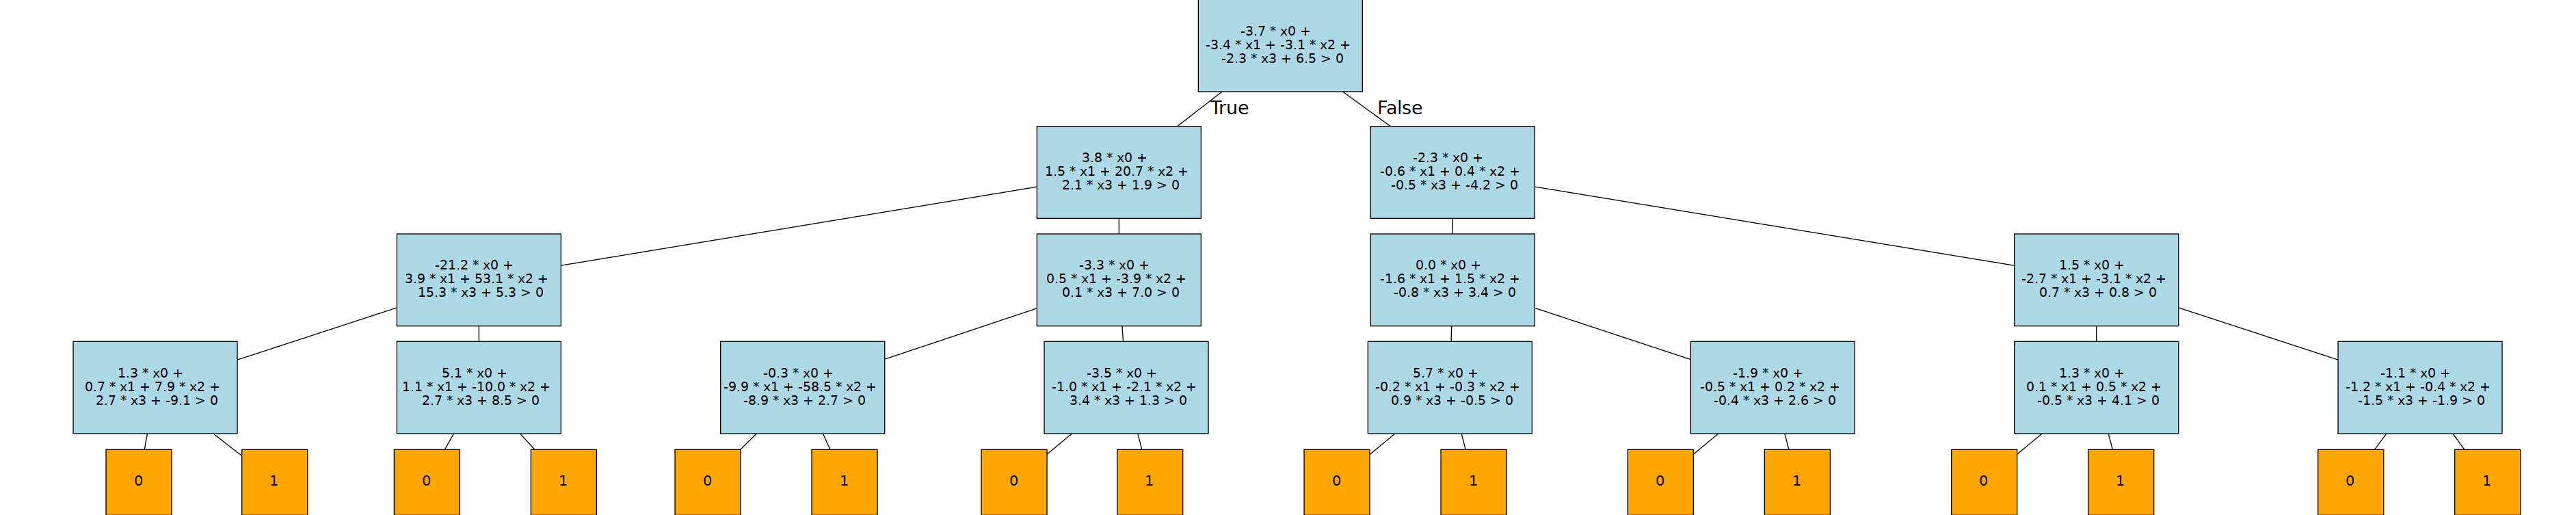

In [19]:
Image(filename='cart_dt_15internal_nodes.png')

End!